In [1]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 4.9 MB/s 


# **Import Library**

In [2]:
# LIBRARY UNTUK MENGOLAH DATA
import pandas as pd
import numpy as np
import re,string #import regular expression
import Sastrawi
import joblib

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

#Library Untuk Split Data
from sklearn import model_selection
from sklearn.model_selection import train_test_split

#Library Ekstraksi Fitur TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

#Library Klasifikasi Support Vector Machine
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score as prec
from sklearn.metrics import recall_score as recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics


#Library HyperParameter Tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import timeit

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Aspek Kamera**

In [4]:
tweet_kamera = pd.read_csv('/content/drive/MyDrive/Dataset TA/aspek_kamera.csv')
tweet_kamera.shape

(3000, 3)

In [5]:
tweet_kamera['label'].value_counts()

 1    1538
 0    1430
-1      32
Name: label, dtype: int64

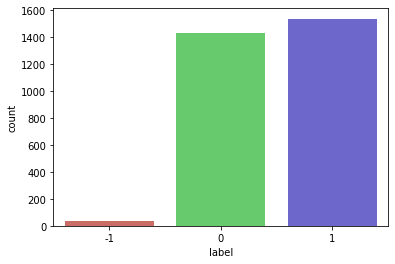

In [6]:
kamera = sns.countplot(tweet_kamera['label'], palette = 'hls')
plt.show()

In [7]:
tweet_kamera.isna().sum()

tweet       0
stemming    0
label       0
dtype: int64

## Inisialisasi Data

In [8]:
x_kamera = tweet_kamera['stemming']
y_kamera = tweet_kamera['label'].values

## Split Data



In [9]:
from sklearn.model_selection import train_test_split
x_kamera_train, x_kamera_test, y_kamera_train, y_kamera_test = train_test_split(
    tweet_kamera['stemming'], 
    tweet_kamera['label'], 
    test_size=0.2)

train_df = pd.DataFrame()
train_df['tweet'] = x_kamera_train
train_df['sentiment'] = y_kamera_train
test_df = pd.DataFrame()
test_df['tweet'] = x_kamera_test
test_df['sentiment'] = y_kamera_test

## Feature TF-IDF

In [10]:
tfidf_vect = TfidfVectorizer(use_idf=True)
tfidf_vect.fit(x_kamera_train)
x_kamera_train_vectorized = tfidf_vect.transform(x_kamera_train)
x_kamera_test_vectorized = tfidf_vect.transform(x_kamera_test)

In [11]:
print (x_kamera_train_vectorized)

  (0, 2009)	0.18808806253354576
  (0, 1243)	0.1870701446044448
  (0, 1103)	0.2181426515917979
  (0, 924)	0.11253233334301486
  (0, 816)	0.1881810678275829
  (0, 490)	0.1906271357066872
  (0, 328)	0.2125495554365115
  (0, 210)	0.8480488284277544
  (0, 139)	0.18238133448495983
  (1, 2009)	0.19884533253235445
  (1, 1243)	0.1977691970967702
  (1, 1148)	0.5832461333640531
  (1, 1103)	0.23061882562336622
  (1, 924)	0.11896836483305613
  (1, 816)	0.19894365705317182
  (1, 490)	0.2015296222349359
  (1, 334)	0.5943652130910593
  (1, 191)	0.20783162727711688
  (1, 139)	0.1928122211205635
  (2, 2106)	0.4735942722166662
  (2, 1591)	0.33970909563884844
  (2, 1103)	0.13049624046138475
  (2, 1036)	0.1220107927288992
  (2, 924)	0.06731854740213915
  (2, 733)	0.5073156626178322
  :	:
  (2398, 2009)	0.1232137522434425
  (2398, 1243)	0.12254692902334559
  (2398, 1116)	0.4761266559714604
  (2398, 1103)	0.14290207610685354
  (2398, 924)	0.1474365874488157
  (2398, 816)	0.12327467865792334
  (2398, 490)	0.1

## Klasifikasi SVM

* SVM Using Linear Kernel

In [32]:
linear_svc = SVC(kernel='linear')
linear_svc.fit(x_kamera_train_vectorized , y_kamera_train)
y_pred= linear_svc.predict(x_kamera_test_vectorized)
print('Model accuracy score with linear kernel: {0:0.4f}'. format(accuracy_score(y_kamera_test, y_pred))) 

Model accuracy score with linear kernel: 0.9867


* SVM Using Polynomial Kernel

In [33]:
poly_svc = SVC(kernel='poly')
poly_svc.fit(x_kamera_train_vectorized , y_kamera_train)
y_pred= poly_svc.predict(x_kamera_test_vectorized)
print('Model accuracy score with poly kernel: {0:0.4f}'. format(accuracy_score(y_kamera_test, y_pred))) 

Model accuracy score with poly kernel: 0.9400


* SVM with default RBF Kernel

In [34]:
rbf_svc=SVC(kernel='rbf') 
rbf_svc.fit(x_kamera_train_vectorized , y_kamera_train)
y_pred= rbf_svc.predict(x_kamera_test_vectorized)
print('Model accuracy score with rbf kernel: {0:0.4f}'. format(accuracy_score(y_kamera_test, y_pred))) 

Model accuracy score with rbf kernel: 0.9817


## Before Tuning with Hyperparameter

In [35]:
### create model
clf_linear = SVC(kernel='linear')
### cross-validation evaluation
cv_linear = cross_val_score(clf_linear, x_kamera_train_vectorized, y_kamera_train, scoring='accuracy', cv=5)
### Show CV result
print("Accuracy Score Linear of : %0.4f" % (cv_linear.mean()))


Accuracy Score Linear of : 0.9700


In [36]:
### create model
clf_poly = SVC(kernel='poly')
### cross-validation evaluation
cv_poly = cross_val_score(clf_poly, x_kamera_train_vectorized, y_kamera_train, scoring='accuracy', cv=5)
### Show CV result
print("Accuracy Score Poly' of : %0.4f" % (cv_poly.mean()))

Accuracy Score Poly' of : 0.9150


In [37]:
### create model
clf_rbf = SVC(kernel='rbf')
### cross-validation evaluation
cv_rbf= cross_val_score(clf_rbf, x_kamera_train_vectorized, y_kamera_train, scoring='accuracy', cv=5)
### Show CV result
print("Accuracy Score RBF' of : %0.4f" % (cv_rbf.mean()))

Accuracy Score RBF' of : 0.9658


## Tuning Parameter with GridSearchCV

* Linear Kernel

In [18]:
param_grid = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'kernel': ['linear']
             }
 
grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3) 
# fitting the model for grid search
grid.fit(x_kamera_train_vectorized, y_kamera_train)

selected_kernel_linear = grid.best_params_['kernel']
print("Selected Kernel: ", selected_kernel_linear)
selected_C_linear = grid.best_params_['C']
print("Selected C: ", selected_C_linear)

best_params_linear_HT = grid.best_params_
model_looks_linear_HT= grid.best_estimator_
print(f'Best Score : {grid.best_score_}')
print("best estimator: %s" % (model_looks_linear_HT))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ............C=0.001, kernel=linear;, score=0.512 total time=   0.4s
[CV 2/5] END ............C=0.001, kernel=linear;, score=0.512 total time=   0.4s
[CV 3/5] END ............C=0.001, kernel=linear;, score=0.512 total time=   0.4s
[CV 4/5] END ............C=0.001, kernel=linear;, score=0.510 total time=   0.4s
[CV 5/5] END ............C=0.001, kernel=linear;, score=0.512 total time=   0.4s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.944 total time=   0.3s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.952 total time=   0.3s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.946 total time=   0.3s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.950 total time=   0.3s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.950 total time=   0.3s
[CV 1/5] END ................C=1, kernel=linear;, score=0.960 total time=   0.2s
[CV 2/5] END ................C=1, kernel=linear;,

* Polynomial Kernel

In [19]:
param_grid = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'kernel': ['poly'],
              'degree':[1, 2, 3, 4, 5, 6],
              'gamma' :['auto', 'scale']
             }
 
grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3) 
# fitting the model for grid search
grid.fit(x_kamera_train_vectorized, y_kamera_train)

selected_kernel_poly = grid.best_params_['kernel']
print("Selected Kernel: ", selected_kernel_poly)
selected_C_poly= grid.best_params_['C']
print("Selected C: ", selected_C_poly)
selected_gamma_poly = grid.best_params_['gamma']
print("Selected Gamma: ", selected_gamma_poly)
selected_degree_poly = grid.best_params_['degree']
print("Selected Degree: ", selected_degree_poly)

best_params_poly_HT = grid.best_params_
model_looks_poly_HT= grid.best_estimator_

print(f'Best Score : {grid.best_score_}')
print("best estimator: %s" % (model_looks_poly_HT))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.512 total time=   0.4s
[CV 2/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.512 total time=   0.4s
[CV 3/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.512 total time=   0.4s
[CV 4/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.510 total time=   0.4s
[CV 5/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.512 total time=   0.4s
[CV 1/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.512 total time=   0.4s
[CV 2/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.512 total time=   0.4s
[CV 3/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.512 total time=   0.4s
[CV 4/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.510 total time=   0.4s
[CV 5/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.512 total time=   0.4s
[CV 1/5] END C=0.001, degree=2, gamma=auto,

* RBF Kernel

In [20]:
param_grid = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'kernel': ['rbf'],
              'gamma' :['auto', 'scale']
             }
 
grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3) 
# fitting the model for grid search
grid.fit(x_kamera_train_vectorized, y_kamera_train)

selected_kernel_rbf = grid.best_params_['kernel']
print("Selected Kernel: ", selected_kernel_rbf)
selected_C_rbf = grid.best_params_['C']
print("Selected C: ", selected_C_rbf)
selected_gamma_rbf= grid.best_params_['gamma']
print("Selected Gamma: ", selected_gamma_rbf)

best_params_rbf_HT = grid.best_params_
model_looks_rbf_HT= grid.best_estimator_

print(f'Best Score : {grid.best_score_}')
print("best estimator: %s" % (model_looks_rbf_HT))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.512 total time=   0.5s
[CV 2/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.512 total time=   0.5s
[CV 3/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.512 total time=   0.5s
[CV 4/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.510 total time=   0.5s
[CV 5/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.512 total time=   0.5s
[CV 1/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.512 total time=   0.5s
[CV 2/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.512 total time=   0.5s
[CV 3/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.512 total time=   0.5s
[CV 4/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.510 total time=   0.5s
[CV 5/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.512 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.512 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf;

## CV with Tuned Hyperparamater

In [21]:
#(Linear)

cross_val_score_linear= cross_val_score(model_looks_linear_HT, x_kamera_train_vectorized, y_kamera_train, scoring='accuracy', cv=5)
print("Accuracy Score Linear of : %0.2f" % cross_val_score_linear.mean(), cross_val_score_linear.std())

cross_val_score_poly = cross_val_score(model_looks_poly_HT, x_kamera_train_vectorized, y_kamera_train, scoring='accuracy', cv=5)
print("Accuracy Score Poly of : %0.2f" % cross_val_score_poly.mean(), cross_val_score_poly.std())

cross_val_score_rbf = cross_val_score(model_looks_rbf_HT, x_kamera_train_vectorized, y_kamera_train, scoring='accuracy', cv=5)
print("Accuracy Score RBF of : %0.2f" % cross_val_score_rbf.mean(), cross_val_score_rbf.std())

Accuracy Score Linear of : 0.97 0.005034602488997721
Accuracy Score Poly of : 0.97 0.005034602488997721
Accuracy Score RBF of : 0.97 0.004039733214513593


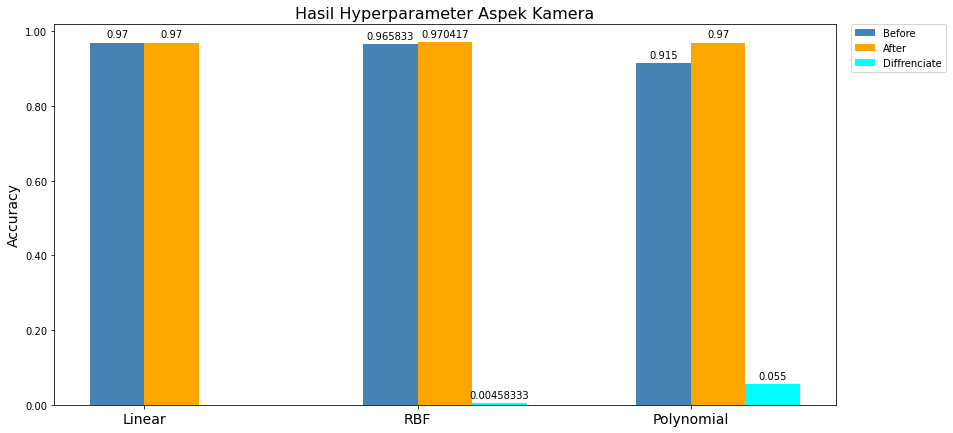

In [22]:
import numpy as np
from matplotlib.ticker import FormatStrFormatter

import matplotlib.pyplot as plt
%matplotlib inline


name = ['Linear', 'RBF', 'Polynomial']
before_HT = [cv_linear.mean(), cv_rbf.mean(), cv_poly.mean()]
after_HT = [cross_val_score_linear.mean(), cross_val_score_rbf.mean(), cross_val_score_poly.mean()]
diff_linear = ((cross_val_score_linear.mean()-cv_linear.mean()))
diff_rbf = ((cross_val_score_rbf.mean()-cv_rbf.mean()))
diff_poly = ((cross_val_score_poly.mean()-cv_poly.mean()))
diff_HT = [diff_linear, diff_rbf, diff_poly]

x = np.arange(len(name))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 7))

bfr = ax.bar(x - width/2, before_HT, width, label='Before', color='steelblue')
aftr = ax.bar(x + width/2, after_HT, width, label='After', color='orange')
diff = ax.bar(x + 0.3, diff_HT, width, label='Diffrenciate', color='cyan')

ax.set_title('Hasil Hyperparameter Aspek Kamera', size=16)
ax.set_ylabel('Accuracy', size=14)
ax.set_xticks(x)
ax.set_xticklabels(name, size=14)
ax.legend(fontsize=14)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.yaxis.set_major_formatter(FormatStrFormatter("%0.2f"))
for p in ax.patches:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2
    if h!= 0:
      ax.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,5), textcoords="offset points",
                  ha="center", fontsize=10)
    
plt.show()

## Model Validation

### Model Validation SVM

* Linear Kernel

In [23]:
predictions_SVM = linear_svc.predict(x_kamera_test_vectorized)

print('Confusion Matrix : \n', confusion_matrix(y_kamera_test, predictions_SVM))
print('Report Hasil : \n',classification_report(y_kamera_test, predictions_SVM))

Confusion Matrix : 
 [[  1   0   4]
 [  0 283   3]
 [  0   1 308]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       1.00      0.20      0.33         5
           0       1.00      0.99      0.99       286
           1       0.98      1.00      0.99       309

    accuracy                           0.99       600
   macro avg       0.99      0.73      0.77       600
weighted avg       0.99      0.99      0.98       600



* Poly Kernel

In [24]:
predictions_SVM = poly_svc.predict(x_kamera_test_vectorized)

print('Confusion Matrix : \n', confusion_matrix(y_kamera_test, predictions_SVM))
print('Report Hasil : \n',classification_report(y_kamera_test, predictions_SVM))

Confusion Matrix : 
 [[  0   1   4]
 [  0 271  15]
 [  0  16 293]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         5
           0       0.94      0.95      0.94       286
           1       0.94      0.95      0.94       309

    accuracy                           0.94       600
   macro avg       0.63      0.63      0.63       600
weighted avg       0.93      0.94      0.94       600



* RBF Kernel

In [25]:
predictions_SVM = rbf_svc.predict(x_kamera_test_vectorized)

print('Confusion Matrix : \n', confusion_matrix(y_kamera_test, predictions_SVM))
print('Report Hasil : \n',classification_report(y_kamera_test, predictions_SVM))

Confusion Matrix : 
 [[  0   0   5]
 [  0 282   4]
 [  0   2 307]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         5
           0       0.99      0.99      0.99       286
           1       0.97      0.99      0.98       309

    accuracy                           0.98       600
   macro avg       0.65      0.66      0.66       600
weighted avg       0.97      0.98      0.98       600



### Model Validation Hyperparameter Tuning Test Dataset

* Linear Kernel

In [26]:
grid_predictions = model_looks_linear_HT.predict(x_kamera_test_vectorized)

print('Confusion Matrix : \n', confusion_matrix(y_kamera_test, grid_predictions))
print('Report Hasil : \n',classification_report(y_kamera_test, grid_predictions))

Confusion Matrix : 
 [[  1   0   4]
 [  0 283   3]
 [  0   1 308]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       1.00      0.20      0.33         5
           0       1.00      0.99      0.99       286
           1       0.98      1.00      0.99       309

    accuracy                           0.99       600
   macro avg       0.99      0.73      0.77       600
weighted avg       0.99      0.99      0.98       600



* Poly Kernel

In [27]:
grid_predictions = model_looks_poly_HT.predict(x_kamera_test_vectorized)

print('Confusion Matrix : \n', confusion_matrix(y_kamera_test, grid_predictions))
print('Report Hasil : \n',classification_report(y_kamera_test, grid_predictions))

Confusion Matrix : 
 [[  1   0   4]
 [  0 283   3]
 [  0   1 308]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       1.00      0.20      0.33         5
           0       1.00      0.99      0.99       286
           1       0.98      1.00      0.99       309

    accuracy                           0.99       600
   macro avg       0.99      0.73      0.77       600
weighted avg       0.99      0.99      0.98       600



* RBF Kernel

In [28]:
grid_predictions = model_looks_rbf_HT.predict(x_kamera_test_vectorized)

print('Confusion Matrix : \n', confusion_matrix(y_kamera_test, grid_predictions))
print('Report Hasil : \n',classification_report(y_kamera_test, grid_predictions))

Confusion Matrix : 
 [[  0   0   5]
 [  0 281   5]
 [  0   2 307]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         5
           0       0.99      0.98      0.99       286
           1       0.97      0.99      0.98       309

    accuracy                           0.98       600
   macro avg       0.65      0.66      0.66       600
weighted avg       0.97      0.98      0.98       600



### Model Validation Hyperparameter Tuning Train Dataset

* Linear Kernel

In [29]:
grid_predictions = model_looks_linear_HT.predict(x_kamera_train_vectorized)

print('Confusion Matrix : \n', confusion_matrix(y_kamera_train, grid_predictions))
print('Report Hasil : \n',classification_report(y_kamera_train, grid_predictions))

Confusion Matrix : 
 [[  14    1   12]
 [   0 1138    6]
 [   1    8 1220]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       0.93      0.52      0.67        27
           0       0.99      0.99      0.99      1144
           1       0.99      0.99      0.99      1229

    accuracy                           0.99      2400
   macro avg       0.97      0.84      0.88      2400
weighted avg       0.99      0.99      0.99      2400



* Poly Kernel

In [30]:
grid_predictions = model_looks_poly_HT.predict(x_kamera_train_vectorized)

print('Confusion Matrix : \n', confusion_matrix(y_kamera_train, grid_predictions))
print('Report Hasil : \n',classification_report(y_kamera_train, grid_predictions))

Confusion Matrix : 
 [[  14    1   12]
 [   0 1138    6]
 [   1    7 1221]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       0.93      0.52      0.67        27
           0       0.99      0.99      0.99      1144
           1       0.99      0.99      0.99      1229

    accuracy                           0.99      2400
   macro avg       0.97      0.84      0.88      2400
weighted avg       0.99      0.99      0.99      2400



* RBF Kernel

In [31]:
grid_predictions = model_looks_rbf_HT.predict(x_kamera_train_vectorized)

print('Confusion Matrix : \n', confusion_matrix(y_kamera_train, grid_predictions))
print('Report Hasil : \n',classification_report(y_kamera_train, grid_predictions))

Confusion Matrix : 
 [[  26    0    1]
 [   0 1144    0]
 [   0    0 1229]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       1.00      0.96      0.98        27
           0       1.00      1.00      1.00      1144
           1       1.00      1.00      1.00      1229

    accuracy                           1.00      2400
   macro avg       1.00      0.99      0.99      2400
weighted avg       1.00      1.00      1.00      2400

